In [ ]:
pip install rasterio

In [ ]:
pip install simplekml

In [3]:
# First, let's import the needed libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


# Import data

In [4]:

# อ่านไฟล์ CSV
df = pd.read_csv("Groundwater Quality Database.csv")

# แสดงข้อมูล
df.head()


,Well Name,Data Source,Date,District,Subdistrict,UTMX,UTMY,UTM Zone,Surface Elevation of Well (m),Measuring Depth (m),Groundwater Level (m),Distance from Sea (m),Groundwater Extraction (m³/day),Cl concentration (mg/L),TDS Concentration (mg/L)
0,B1,NaN,2014,Thalang,Choengthale,423630,884067,47N,15,NaN,1.88,1640,920.00,11.5,127.5
1,B1,NaN,2015,Thalang,Choengthale,423630,884067,47N,15,NaN,1.74,1640,1096.83,10.5,123.5
2,B1,NaN,2016,Thalang,Choengthale,423630,884067,47N,15,NaN,2.40,1640,1071.25,11.0,129.0
3,B2,NaN,2014,Thalang,Sisunthon,428895,883097,47N,22,NaN,7.75,4000,470.00,8.0,72.5
4,B2,NaN,2015,Thalang,Sisunthon,428895,883097,47N,22,NaN,8.99,4000,559.50,6.0,76.0


ดูเหมือนว่าข้อมูลที่คุณให้มาเป็นข้อมูลเกี่ยวกับสถานีตรวจวัดที่น้ำใต้ดินซึ่งประกอบด้วยข้อมูลหลายคอลัมน์เช่น ชื่อสถานี (Station Name), อำเภอ (District), ตำบล (Subdistrict), พิกัด UTM (UTMX, UTMY), ความสูงของพื้นผิวสถานี (Surface Elevation of Station), ความหนาของชั้นแรก (Thickness of 1st Layer), ค่าความต้านทานของชั้นแรก (Resistivity of 1st Layer), ประเภทดินของชั้นแรก (Soil Type of 1st Layer), ค่าความต้านทานของชั้นที่สอง (Resistivity of 2nd Layer), ประเภทดินของชั้นที่สอง (Soil Type of 2nd Layer), ความนำไฟฟ้าในแนวยาว (Longitudinal Conductance), และความต้านทานแนวทางข้าม (Transverse Resistance).

# cleaned data

In [5]:
# ลบคอลัมน์ที่มีค่า NaN ใน DataFrame
df_cleaned = df.dropna(axis=1)

# แสดงข้อมูลหลังจากลบคอลัมน์ที่มีค่า NaN
df_cleaned


,Well Name,Date,District,Subdistrict,UTMX,UTMY,UTM Zone,Surface Elevation of Well (m),Groundwater Level (m),Distance from Sea (m),Groundwater Extraction (m³/day),Cl concentration (mg/L),TDS Concentration (mg/L)
0,B1,2014,Thalang,Choengthale,423630,884067,47N,15,1.88,1640,920.00,11.5,127.5
1,B1,2015,Thalang,Choengthale,423630,884067,47N,15,1.74,1640,1096.83,10.5,123.5
2,B1,2016,Thalang,Choengthale,423630,884067,47N,15,2.40,1640,1071.25,11.0,129.0
3,B2,2014,Thalang,Sisunthon,428895,883097,47N,22,7.75,4000,470.00,8.0,72.5
4,B2,2015,Thalang,Sisunthon,428895,883097,47N,22,8.99,4000,559.50,6.0,76.0
5,B2,2016,Thalang,Sisunthon,428895,883097,47N,22,9.51,4000,573.33,6.2,74.0
6,B3,2014,Kathu,Kamala,420666,878738,47N,10,2.23,185,452.75,5720.0,10790.0
7,B3,2015,Kathu,Kamala,420666,878738,47N,10,2.39,185,444.50,5670.0,10850.0
8,B3,2016,Kathu,Kamala,420666,878738,47N,10,2.65,185,480.75,5665.0,10675.0
9,B4,2014,Thalang,Maikhao,423191,898623,47N,11,1.61,458,2039.92,305.0,858.0


In [6]:
df = df_cleaned

# ขั้นตอนที่เราสามารถดูว่ามีกี่เปอร์เซ็นต์ของข้อมูลที่มีค่า Cl concentration และ TDS concentration เกินเกณฑ์ที่ตั้งไว้:

In [7]:
# นับจำนวนแถวทั้งหมดที่มีค่า Cl concentration และ TDS concentration มากกว่าเกณฑ์ที่ตั้งไว้
exceed_threshold = df[(df['Cl concentration (mg/L)'] > 600) & (df['TDS Concentration (mg/L)'] > 1500)].shape[0]

# หารจำนวนแถวทั้งหมดที่มีค่า Cl concentration และ TDS concentration ด้วยจำนวนแถวทั้งหมด
total_rows = df.shape[0]

# คำนวณเปอร์เซ็นต์ของข้อมูลที่เกินเกณฑ์
percentage_exceed_threshold = (exceed_threshold / total_rows) * 100
# ตรวจสอบว่าเปอร์เซ็นต์ของข้อมูลที่เกินเกณฑ์มากกว่าหรือเท่ากับ 80% หรือไม่
if percentage_exceed_threshold >= 80:
    print("More than 80% of the data points exceed the threshold.")
else:
    print("Less than 80% of the data points exceed the threshold.")

print("Percentage of data exceeding threshold:", percentage_exceed_threshold)


Less than 80% of the data points exceed the threshold.
Percentage of data exceeding threshold: 42.42424242424242


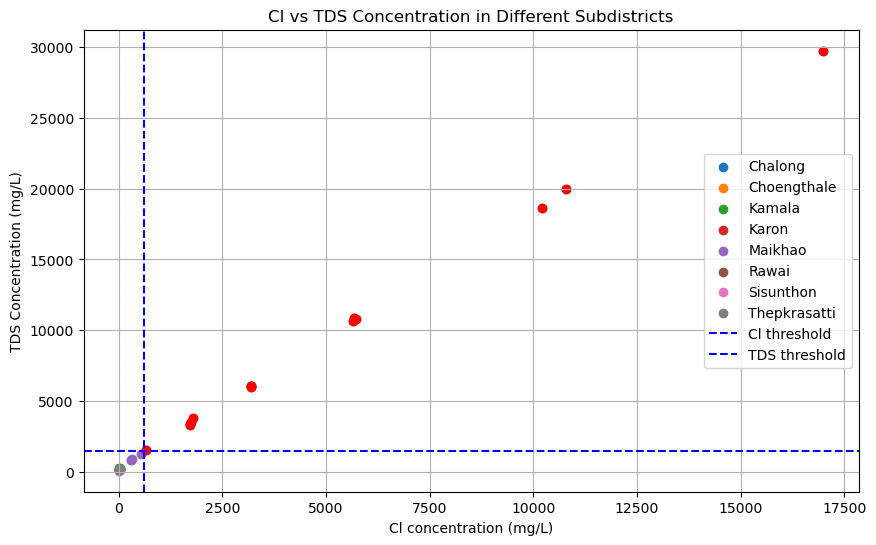

In [8]:
import matplotlib.pyplot as plt

# พล็อตจุดข้อมูล Cl concentration และ TDS concentration ของทุก subdistrict
plt.figure(figsize=(10, 6))
for subdistrict, data in df.groupby('Subdistrict'):
    plt.scatter(data['Cl concentration (mg/L)'], data['TDS Concentration (mg/L)'], label=subdistrict)

# เพิ่มเส้นแบ่งเกณฑ์ Cl > 600 และ TDS > 1500
plt.axvline(x=600, color='b', linestyle='--', label='Cl threshold')
plt.axhline(y=1500, color='b', linestyle='--', label='TDS threshold')

# คำนวณข้อมูลที่เกินเกณฑ์และพล็อตด้วยสีแดง
for subdistrict, data in df.groupby('Subdistrict'):
    exceed_threshold_data = data[(data['Cl concentration (mg/L)'] > 600) & (data['TDS Concentration (mg/L)'] > 1500)]
    if not exceed_threshold_data.empty:
        plt.scatter(exceed_threshold_data['Cl concentration (mg/L)'], exceed_threshold_data['TDS Concentration (mg/L)'], color='r')

plt.xlabel('Cl concentration (mg/L)')
plt.ylabel('TDS Concentration (mg/L)')
plt.title('Cl vs TDS Concentration in Different Subdistricts')
plt.legend()
plt.grid(True)
plt.show()


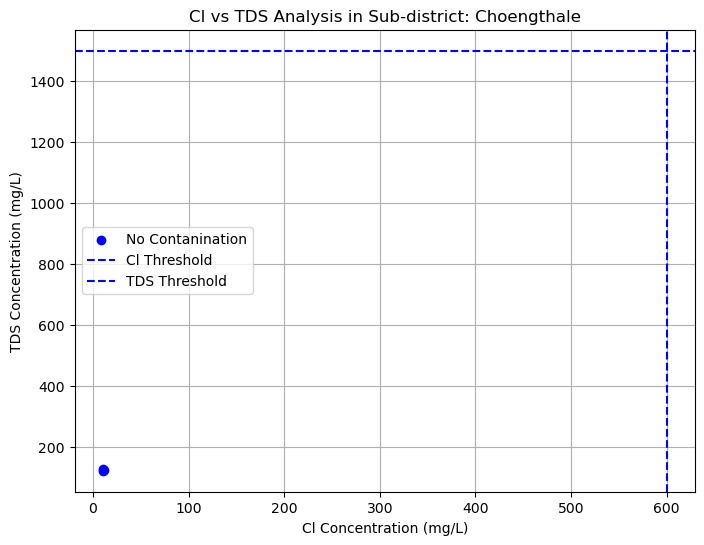

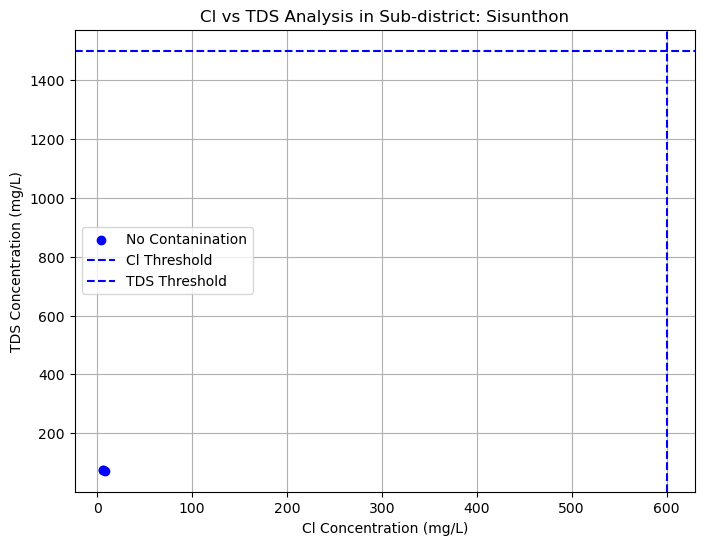

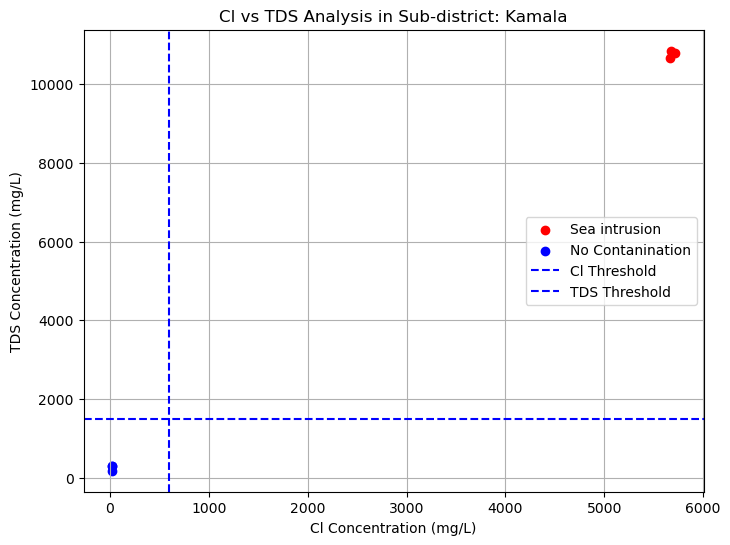

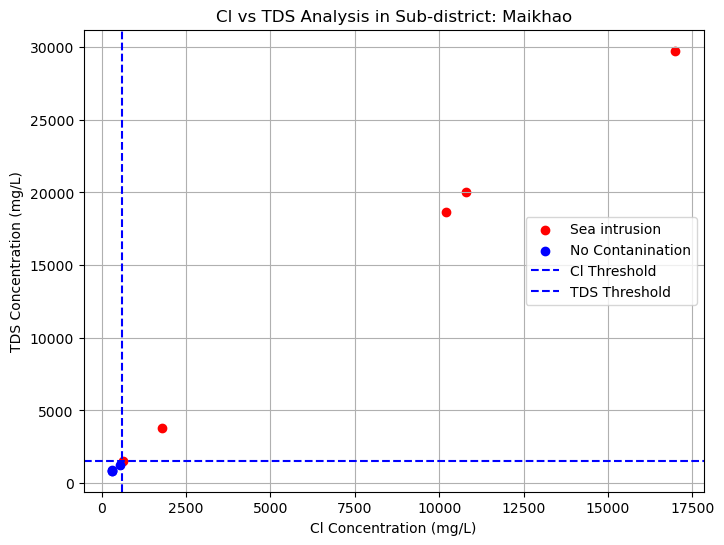

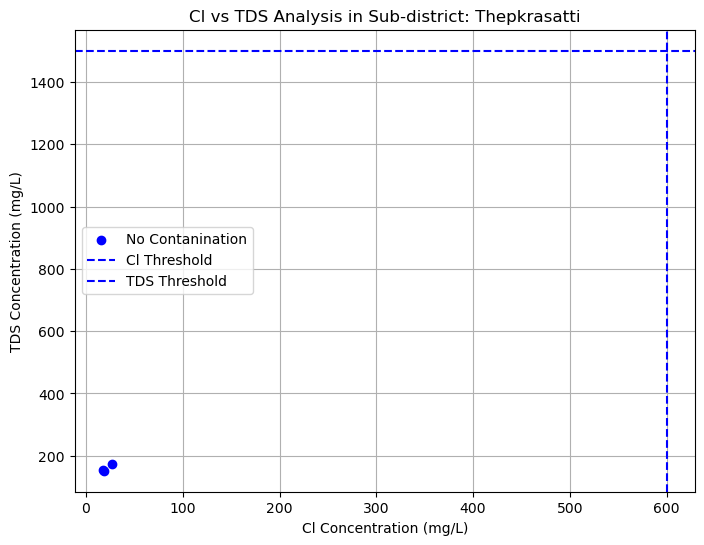

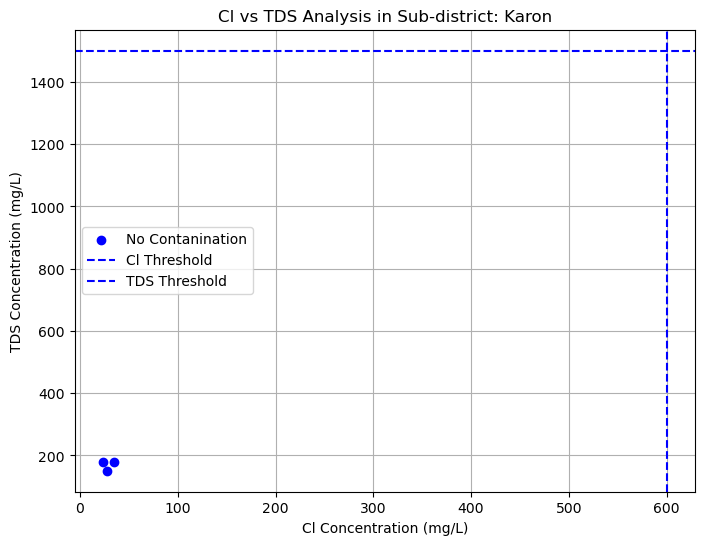

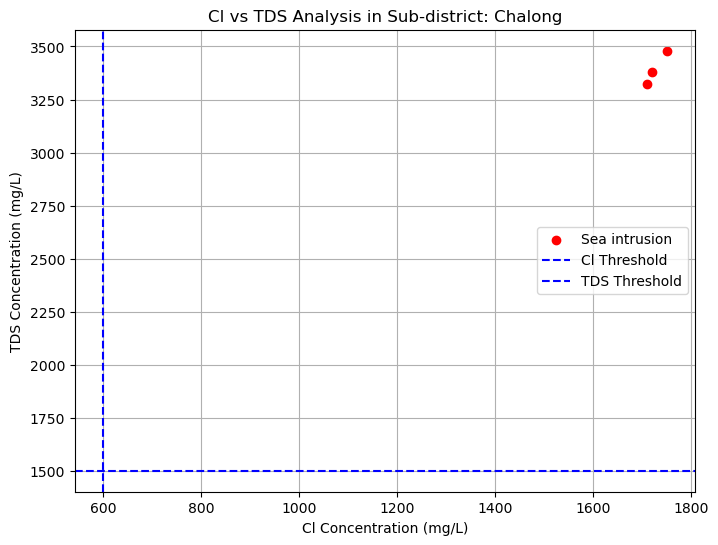

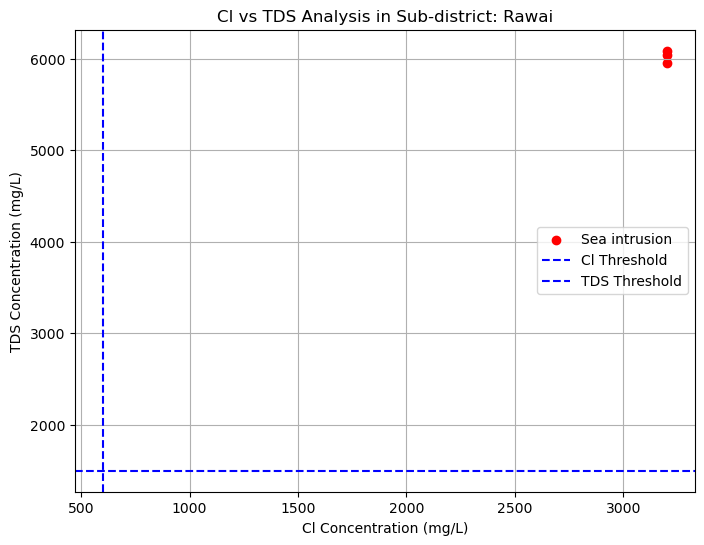

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("Groundwater Quality Database.csv")

# Function to determine zone based on Cl and TDS
def determine_zone(cl_value, tds_value):
    if cl_value > 600 and tds_value > 1500:
        return 1
    elif cl_value > 600:
        return 2
    elif tds_value > 1500:
        return 4
    else:
        return 3

# Add 'Zone' column based on Cl and TDS
df['Zone'] = df.apply(lambda row: determine_zone(row['Cl concentration (mg/L)'], row['TDS Concentration (mg/L)']), axis=1)

# Function to analyze and plot the graph for each sub-district
def analyze_and_plot(subdistrict):
    plt.figure(figsize=(8, 6))
    sub_data = df[df['Subdistrict'] == subdistrict]
    for zone, data in sub_data.groupby('Zone'):
        if zone == 1:
            plt.scatter(data['Cl concentration (mg/L)'], data['TDS Concentration (mg/L)'], label='Sea intrusion', color='red')
        elif zone == 2:
            plt.scatter(data['Cl concentration (mg/L)'], data['TDS Concentration (mg/L)'], label='Need to monitor Cl concentration', color='orange')
        elif zone == 3:
            plt.scatter(data['Cl concentration (mg/L)'], data['TDS Concentration (mg/L)'], label='No Contanination', color='blue')
        elif zone == 4:
            plt.scatter(data['Cl concentration (mg/L)'], data['TDS Concentration (mg/L)'], label='Need to monitor Cl concentration and sediment', color='green')

    # Add Cl > 600 and TDS > 1500 threshold lines
    plt.axvline(x=600, color='b', linestyle='--', label='Cl Threshold')
    plt.axhline(y=1500, color='b', linestyle='--', label='TDS Threshold')

    plt.xlabel('Cl Concentration (mg/L)')
    plt.ylabel('TDS Concentration (mg/L)')
    plt.title(f'Cl vs TDS Analysis in Sub-district: {subdistrict}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform analysis and plot for each sub-district
subdistricts = df['Subdistrict'].unique()

for subdistrict in subdistricts:
    analyze_and_plot(subdistrict)


In [ ]:
# อ่านไฟล์ CSV
df = pd.read_csv("Groundwater Quality Database.csv")

# แสดงข้อมูล
df.head()


Well Name	Date	District	Subdistrict	UTMX	UTMY	UTM Zone	Surface Elevation of Well (m)	Groundwater Level (m)	Distance from Sea (m)	Groundwater Extraction (m³/day)	Cl concentration (mg/L)	TDS Concentration (mg/L)
0	B1	2014	Thalang	Choengthale	423630	884067	47N	15	1.88	1640	920.00	11.5	127.5
1	B1	2015	Thalang	Choengthale	423630	884067	47N	15	1.74	1640	1096.83	10.5	123.5
2	B1	2016	Thalang	Choengthale	423630	884067	47N	15	2.40	1640	1071.25	11.0	129.0

ใช้ข้อมูล groundwater potential database ทำ analytics ของ Cl และ TDS จาก สักหนึ่ง subdistrict เป็นตัวอย่าง ที่สามารถบอกได้ว่า 80% ของข้อมูลเกินเกณฑ์ที่ตั้งไว้มั้ย (เกณฑ์ในแกน x คือ Cl เป็น 600 และ y คือ TDS เป็น 1500 ได้เลย)


โดยดูจากเมื่อเราพล็อตกราฟออกมาจะแบ่งเป็น 4  (ส่วนที่ 2คือ ส่วนในแกน x>600, y<1500) , (เป็นส่วนที่ 1 คือในแกน x>600, y>1500 ) ,(เป็นส่วน 3 คือ x<600, y<1500 ) ขวาล่าง (เป็นส่วน 4 คือ x<600, y>1500) ลำดับความสำคัญคือ
: ส่วนที่ 1 > ส่วนที่ 2 = ส่วนที่ 4 > ส่วนที่ 3

เช่น
กรณีที่ 1  ค่าอยู่ในช่องส่วนที่ 3 -> บอกว่าตำบลนั้น : Nocatamination เช่น Chalong : Nocatamination

กรณีที่ 2 ค่าอยู่ในช่วงส่วน 3 และส่วน2 ->  Chalong : Need to monitor sedimot
หรือ  3 และส่วน 4 ->  Chalong : Need to monitor Cl concentration
หรือ 3 และส่วน 2 และส่วน 4  ->  Chalong : Need to monitor sedimot and  Need to monitor Cl concentration

กรณีที่ 3 ค่าอยู่ในช่องไหนก็ตามถ้ามีแค่ 1 ตัวอยู่ในส่วนที่ 1 -> Chalong : Seq intrusion

ต้องการให้พล็อตกราฟแยกออกมาเลยเป็นแต่ละตำบล 1 graph = 1  ตำบล 

# contour ของเกาะ phuket โดยการทำ interpolation ด้วยวิธี IDW method

In [22]:
# อ่านไฟล์ CSV
df = pd.read_csv("Groundwater Potential Database.csv")

# แสดงข้อมูล
df.head()


,Station Name,Data Source,Date,District,Subdistrict,UTMX,UTMY,UTM Zone,Surface Elevation of Station (m),Type of Aquifer,...,Layer Type of 14th Layer,Thickness of 14th Layer (m),Resistivity of 14th Layer (Ω-m),Soil Type of 14th Layer,Layer Type of 15th Layer,Thickness of 15th Layer (m),Resistivity of 15th Layer (Ω-m),Soil Type of 15th Layer,"Longitudinal Conductance, S (mho)","Transverse Resistance, T (Ohm-m²)"
0,VES-18,NaN,NaN,Kathu,Kamala,420825,878440,47N,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.119231,863.951
1,VES-19,NaN,NaN,Kathu,Kamala,423061,878654,47N,43,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177555,2327.785
2,VES-20,NaN,NaN,Kathu,Kathu,428337,877270,47N,78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.675113,1740.508
3,VES-22,NaN,NaN,Kathu,Kathu,427071,875008,47N,24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.274600,4374.138
4,VES-24,NaN,NaN,Kathu,Kathu,427417,872842,47N,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061008,2698.149


In [23]:
# ลบคอลัมน์ที่มีค่า NaN ใน DataFrame
df_cleaned = df.dropna(axis=1)

# แสดงข้อมูลหลังจากลบคอลัมน์ที่มีค่า NaN
df_cleaned


,Station Name,District,Subdistrict,UTMX,UTMY,UTM Zone,Surface Elevation of Station (m),Thickness of 1st Layer (m),Resistivity of 1st Layer (Ω-m),Soil Type of 1st Layer,Resistivity of 2nd Layer (Ω-m),Soil Type of 2nd Layer,"Longitudinal Conductance, S (mho)","Transverse Resistance, T (Ohm-m²)"
0,VES-18,Kathu,Kamala,420825,878440,47N,6,11.81,56.5,Soil,14.7,Granite decay,1.119231,863.951
1,VES-19,Kathu,Kamala,423061,878654,47N,43,20.33,114.5,Soil shale,200.2,Granite decay,0.177555,2327.785
2,VES-20,Kathu,Kathu,428337,877270,47N,78,6.75,160.1,Benthic,59.7,Clayey sand,0.675113,1740.508
3,VES-22,Kathu,Kathu,427071,875008,47N,24,27.23,134.1,Benthic,100.5,Granite decay,0.274600,4374.138
4,VES-24,Kathu,Kathu,427417,872842,47N,25,12.83,210.3,Soil,100.4,Weather rock,0.061008,2698.149
5,VES-21,Kathu,Patong,423468,873838,47N,24,10.13,61.8,Clay,21.8,Fractured rock,0.531347,800.652
6,VES-23,Kathu,Patong,420668,871425,47N,78,10.41,107.5,Soil,15.6,Weather rock,2.648760,1740.111
7,VES-12,Mueang,Chalong,425957,868701,47N,20,12.67,92.3,Soil,52.8,Clayey sand,0.645865,2501.085
8,VES-13,Mueang,Karon,422216,866712,47N,7,29.15,139.4,Soil shale,48.7,Granite decay,0.519788,4800.341
9,VES-17,Mueang,Kokaeo,430982,878905,47N,18,5.87,96.0,Soil,43.5,Fractured rock,0.727583,1824.585


In [24]:
df = df_cleaned
df

,Station Name,District,Subdistrict,UTMX,UTMY,UTM Zone,Surface Elevation of Station (m),Thickness of 1st Layer (m),Resistivity of 1st Layer (Ω-m),Soil Type of 1st Layer,Resistivity of 2nd Layer (Ω-m),Soil Type of 2nd Layer,"Longitudinal Conductance, S (mho)","Transverse Resistance, T (Ohm-m²)"
0,VES-18,Kathu,Kamala,420825,878440,47N,6,11.81,56.5,Soil,14.7,Granite decay,1.119231,863.951
1,VES-19,Kathu,Kamala,423061,878654,47N,43,20.33,114.5,Soil shale,200.2,Granite decay,0.177555,2327.785
2,VES-20,Kathu,Kathu,428337,877270,47N,78,6.75,160.1,Benthic,59.7,Clayey sand,0.675113,1740.508
3,VES-22,Kathu,Kathu,427071,875008,47N,24,27.23,134.1,Benthic,100.5,Granite decay,0.274600,4374.138
4,VES-24,Kathu,Kathu,427417,872842,47N,25,12.83,210.3,Soil,100.4,Weather rock,0.061008,2698.149
5,VES-21,Kathu,Patong,423468,873838,47N,24,10.13,61.8,Clay,21.8,Fractured rock,0.531347,800.652
6,VES-23,Kathu,Patong,420668,871425,47N,78,10.41,107.5,Soil,15.6,Weather rock,2.648760,1740.111
7,VES-12,Mueang,Chalong,425957,868701,47N,20,12.67,92.3,Soil,52.8,Clayey sand,0.645865,2501.085
8,VES-13,Mueang,Karon,422216,866712,47N,7,29.15,139.4,Soil shale,48.7,Granite decay,0.519788,4800.341
9,VES-17,Mueang,Kokaeo,430982,878905,47N,18,5.87,96.0,Soil,43.5,Fractured rock,0.727583,1824.585


In [25]:
import geopandas as gpd

# โหลดไฟล์ shapefile
shapefile_path = "42_amarea_phuket.shp"
gdf = gpd.read_file(shapefile_path)

# แสดงข้อมูล
print(gdf.head())


                                            geometry
0  POLYGON ((98.32300 7.49446, 98.32284 7.49437, ...
1  POLYGON ((98.33342 7.52333, 98.33351 7.52316, ...
2  POLYGON ((98.37828 7.61054, 98.37840 7.61040, ...
3  POLYGON ((98.29778 7.73779, 98.29775 7.73756, ...
4  POLYGON ((98.36875 7.74852, 98.36890 7.74836, ...


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


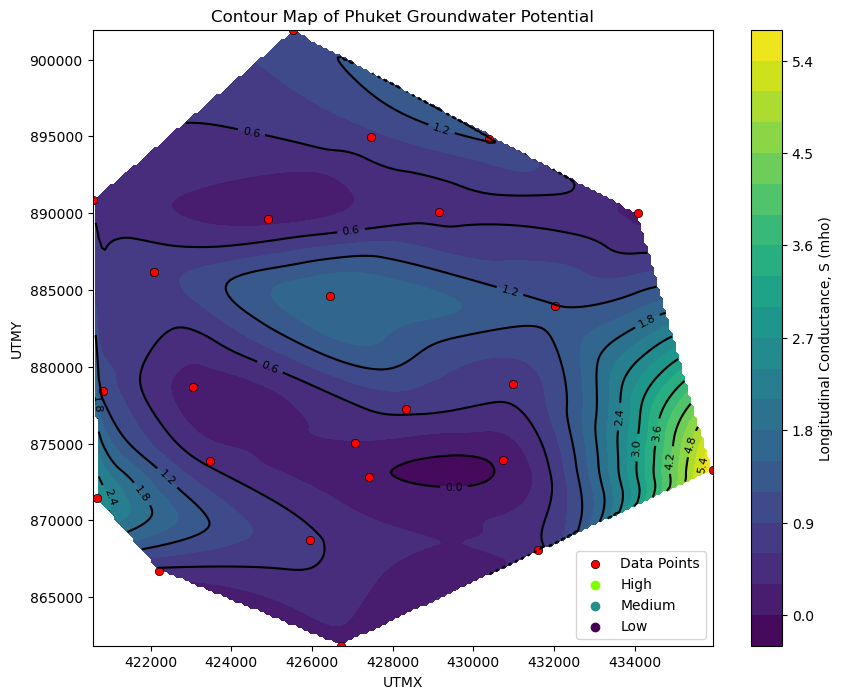

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# อ่านไฟล์ CSV
df = pd.read_csv("Groundwater Potential Database.csv")

# เลือกข้อมูลที่ต้องการใช้
data = df[['UTMX', 'UTMY', 'Longitudinal Conductance,  S (mho)']]

# สร้างเส้น grid
x = np.linspace(data['UTMX'].min(), data['UTMX'].max(), 200)
y = np.linspace(data['UTMY'].min(), data['UTMY'].max(), 200)
X, Y = np.meshgrid(x, y)

# ทำ interpolation ด้วยวิธี IDW method
Z = griddata((data['UTMX'], data['UTMY']), data['Longitudinal Conductance,  S (mho)'], (X, Y), method='cubic')

# แสดงผลลัพธ์ในรูปแบบของ contour map
plt.figure(figsize=(10, 8))

contour = plt.contourf(X, Y, Z, cmap='viridis', levels=20)  # กำหนดจำนวนเส้นระดับ contour ที่เหมาะสม
cbar = plt.colorbar(contour, label='Longitudinal Conductance, S (mho)')
plt.xlabel('UTMX')
plt.ylabel('UTMY')
plt.title('Contour Map of Phuket Groundwater Potential')

# แสดงเส้นขอบของเขตที่แตกต่างกัน
contour_lines = plt.contour(X, Y, Z, colors='black', levels=10)  # กำหนดจำนวนเส้นขอบ contour ที่ต้องการ
plt.clabel(contour_lines, inline=True, fontsize=8)  # เพิ่มคำอธิบายของเส้น contour

# คำนวณค่าสูงสุดของ Longitudinal Conductance
max_conductance = data['Longitudinal Conductance,  S (mho)'].max()

# คำนวณค่าสี Medium โดยกำหนดให้มีค่าใกล้เคียงกับค่าสูงสุด
medium_value = max_conductance * 0.5  # ค่าใกล้เคียงกับค่าสูงสุดของ Conductance
medium_color = plt.cm.viridis(medium_value / max_conductance)

# สร้างสัญลักษณ์ของข้อมูลแต่ละระดับ
low_color = plt.cm.viridis(0)  # สีสำหรับระดับ Low ตามลำดับที่แสดงบนกราฟ
high_color = plt.cm.viridis(1)  # สีสำหรับระดับ High ตามค่าสูงสุดของข้อมูล

# แสดงจุดสีแดงตามค่า Longitudinal Conductance
plt.scatter(data['UTMX'], data['UTMY'], c='red', edgecolors='black', linewidths=0.5, label='Data Points')
plt.scatter([], [], c='Chartreuse', label='High')  # ใช้สีแดงสำหรับ High
plt.scatter([], [], c=medium_color, label='Medium')
plt.scatter([], [], c=low_color, label='Low')

plt.legend(loc='lower right')

plt.show()


In [27]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
groundwater_df = pd.read_csv("Groundwater_Potential_with_lat_lon.csv")

# แสดงข้อมูล Groundwater_Potential_with_lat_lon.csv
print("ข้อมูลจาก Groundwater_Potential_with_lat_lon.csv:")
print(groundwater_df)

ข้อมูลจาก Groundwater_Potential_with_lat_lon.csv:
   Station Name  Data Source  Date District   Subdistrict UTM Zone  \
0        VES-18          NaN   NaN    Kathu        Kamala      47N   
1        VES-19          NaN   NaN    Kathu        Kamala      47N   
2        VES-20          NaN   NaN    Kathu         Kathu      47N   
3        VES-22          NaN   NaN    Kathu         Kathu      47N   
4        VES-24          NaN   NaN    Kathu         Kathu      47N   
5        VES-21          NaN   NaN    Kathu        Patong      47N   
6        VES-23          NaN   NaN    Kathu        Patong      47N   
7        VES-12          NaN   NaN   Mueang       Chalong      47N   
8        VES-13          NaN   NaN   Mueang         Karon      47N   
9        VES-17          NaN   NaN   Mueang        Kokaeo      47N   
10       VES-15          NaN   NaN   Mueang       Ratsada      47N   
11       VES-16          NaN   NaN   Mueang       Ratsada      47N   
12       VES-11          NaN   NaN   Mue

In [28]:
phuket_df = pd.read_csv("42_amarea_phuket.csv")

# แสดงข้อมูล 42_amarea_phuket.csv
print("\nข้อมูลจาก 42_amarea_phuket.csv:")
print(phuket_df)


ข้อมูลจาก 42_amarea_phuket.csv:
                                             geometry
0   POLYGON ((98.32299589500008 7.494461868000087,...
1   POLYGON ((98.33342351900006 7.523334356000078,...
2   POLYGON ((98.37828022100007 7.610539763000077,...
3   POLYGON ((98.29778009500006 7.737787247000085,...
4   POLYGON ((98.36874614500005 7.748523415000079,...
5   POLYGON ((98.30165348400004 7.749409752000076,...
6   POLYGON ((98.33416793400005 7.762925488000064,...
7   POLYGON ((98.39173192700008 7.757343160000062,...
8   POLYGON ((98.30129514600003 7.765979747000074,...
9   POLYGON ((98.36800666300007 7.796360631000084,...
10  POLYGON ((98.28683075900005 7.821397274000049,...
11  POLYGON ((98.41543478100004 7.831201500000077,...
12  POLYGON ((98.42372812100007 7.831088541000042,...
13  POLYGON ((98.45557544600007 7.923434001000089,...
14  POLYGON ((98.43729815800003 7.945110941000053,...
15  POLYGON ((98.45031773700003 7.954322843000057,...
16  POLYGON ((98.45159299800008 7.96398428100008,

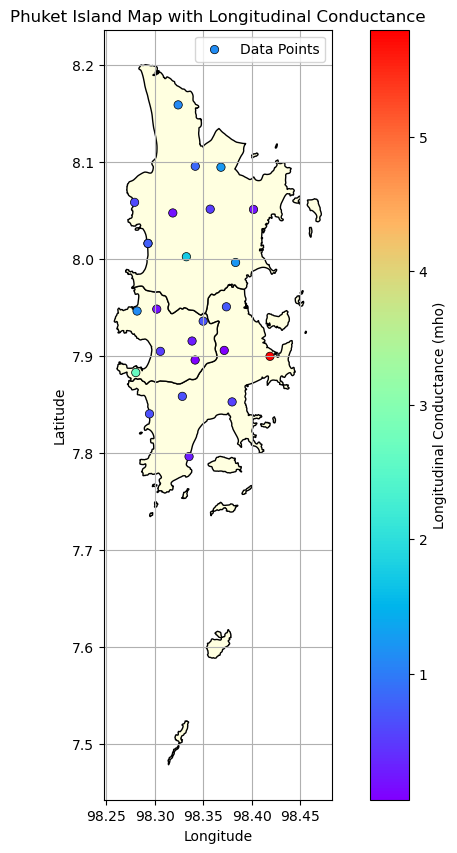

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from scipy.interpolate import griddata

# โหลดข้อมูลเกาะภูเก็ต
phuket_df = gpd.read_file("42_amarea_phuket.shp")

# ข้อมูลที่ใช้สำหรับการกำหนดสี
data = {
    'latitude': [98.28164003, 98.30192309, 98.34981039, 98.33835732, 98.3415273, 98.30568869, 98.28032572, 
                 98.32834316, 98.29443996, 98.37378474, 98.41872192, 98.37154848, 98.33525366, 98.37966523, 
                 98.29288815, 98.29288815, 98.34168768, 98.32400153, 98.40172797, 98.27906604, 98.38323371, 
                 98.33250125, 98.31848849, 98.357069, 98.36815503],
    'longitude': [7.946391718, 7.948361888, 7.935921265, 7.915443421, 7.89585693, 7.904807752, 7.882939471, 
                  7.858380601, 7.840334632, 7.95074669, 7.899670793, 7.905780329, 7.79631549, 7.85267063, 
                  8.016129058, 8.016129058, 8.095742151, 8.159018429, 8.051188215, 8.058489257, 7.996465504, 
                  8.002401555, 8.047549013, 8.051455352, 8.094725712],
    'Longitudinal Conductance': [1.11923063, 0.177554585, 0.675113129, 0.274599708, 0.061008084, 0.53134705, 
                                  2.648760286, 0.645864577, 0.645864577, 0.727582615, 5.796, 0.070220162, 
                                  0.265033808, 0.53688357, 0.760561154, 0.760561154, 0.829623413, 1.100289938, 
                                  0.214882744, 0.600039387, 1.206933333, 1.727331685, 0.203496983, 0.520499001, 
                                  1.241518025]
}

# สร้างเส้น grid
x = np.linspace(min(data['longitude']), max(data['longitude']), 200)
y = np.linspace(min(data['latitude']), max(data['latitude']), 200)
X, Y = np.meshgrid(x, y)

# ทำ interpolation ด้วยวิธี IDW method
Z = griddata((data['longitude'], data['latitude']), data['Longitudinal Conductance'], (X, Y), method='cubic')

# กำหนดสีให้แต่ละช่วงของค่า Longitudinal Conductance
norm = Normalize(min(data['Longitudinal Conductance']), max(data['Longitudinal Conductance']))

# พล็อตแผนที่เกาะภูเก็ตพร้อมกับการเติมสีตามค่า Longitudinal Conductance
fig, ax = plt.subplots(figsize=(10, 10))
phuket_df.plot(ax=ax, edgecolor='black', facecolor='none', color='LightYellow')
sc = ax.scatter(data['latitude'], data['longitude'], c=data['Longitudinal Conductance'], cmap='rainbow', norm=norm, edgecolors='black', linewidths=0.5, label='Data Points')
plt.colorbar(sc, ax=ax, label='Longitudinal Conductance (mho)')
plt.title('Phuket Island Map with Longitudinal Conductance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\scipy\interpolate\_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.21069e-34): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


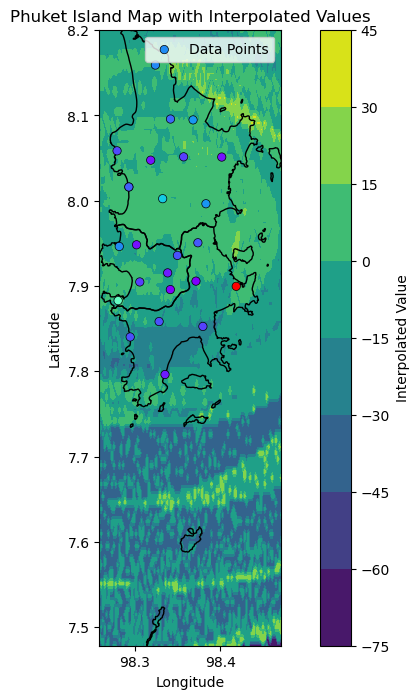

In [30]:
import geopandas as gpd
import pandas as pd
from scipy.interpolate import Rbf
import numpy as np
import matplotlib.pyplot as plt

# Read boundary shapefile
boundary = gpd.read_file('42_amarea_phuket.shp')

# Read data points
data_points = pd.DataFrame({
    'latitude': [98.28164003, 98.30192309, 98.34981039, 98.33835732, 98.3415273, 98.30568869, 98.28032572, 
                 98.32834316, 98.29443996, 98.37378474, 98.41872192, 98.37154848, 98.33525366, 98.37966523, 
                 98.29288815, 98.29288815, 98.34168768, 98.32400153, 98.40172797, 98.27906604, 98.38323371, 
                 98.33250125, 98.31848849, 98.357069, 98.36815503],
    'longitude': [7.946391718, 7.948361888, 7.935921265, 7.915443421, 7.89585693, 7.904807752, 7.882939471, 
                  7.858380601, 7.840334632, 7.95074669, 7.899670793, 7.905780329, 7.79631549, 7.85267063, 
                  8.016129058, 8.016129058, 8.095742151, 8.159018429, 8.051188215, 8.058489257, 7.996465504, 
                  8.002401555, 8.047549013, 8.051455352, 8.094725712],
    'value': [1.11923063, 0.177554585, 0.675113129, 0.274599708, 0.061008084, 0.53134705, 
              2.648760286, 0.645864577, 0.645864577, 0.727582615, 5.796, 0.070220162, 
              0.265033808, 0.53688357, 0.760561154, 0.760561154, 0.829623413, 1.100289938, 
              0.214882744, 0.600039387, 1.206933333, 1.727331685, 0.203496983, 0.520499001, 
              1.241518025]
})

# Create grid for interpolation
x_min, y_min, x_max, y_max = boundary.total_bounds
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Interpolate using IDW (Rbf with linear function)
rbf = Rbf(data_points['latitude'], data_points['longitude'], data_points['value'], function='linear')

# Perform interpolation
z_grid = rbf(x_grid, y_grid)

# Plot interpolated map
plt.figure(figsize=(10, 8))
plt.contourf(x_grid, y_grid, z_grid, cmap='viridis')
boundary.plot(ax=plt.gca(), edgecolor='black', facecolor='none')
plt.colorbar(label='Interpolated Value')

# Plot data points
plt.scatter(data_points['latitude'], data_points['longitude'], c=data_points['value'], cmap='rainbow', edgecolors='black', linewidths=0.5, label='Data Points')

plt.title('Phuket Island Map with Interpolated Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


C:\Users\asus\anaconda3\lib\site-packages\scipy\interpolate\_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.21069e-34): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


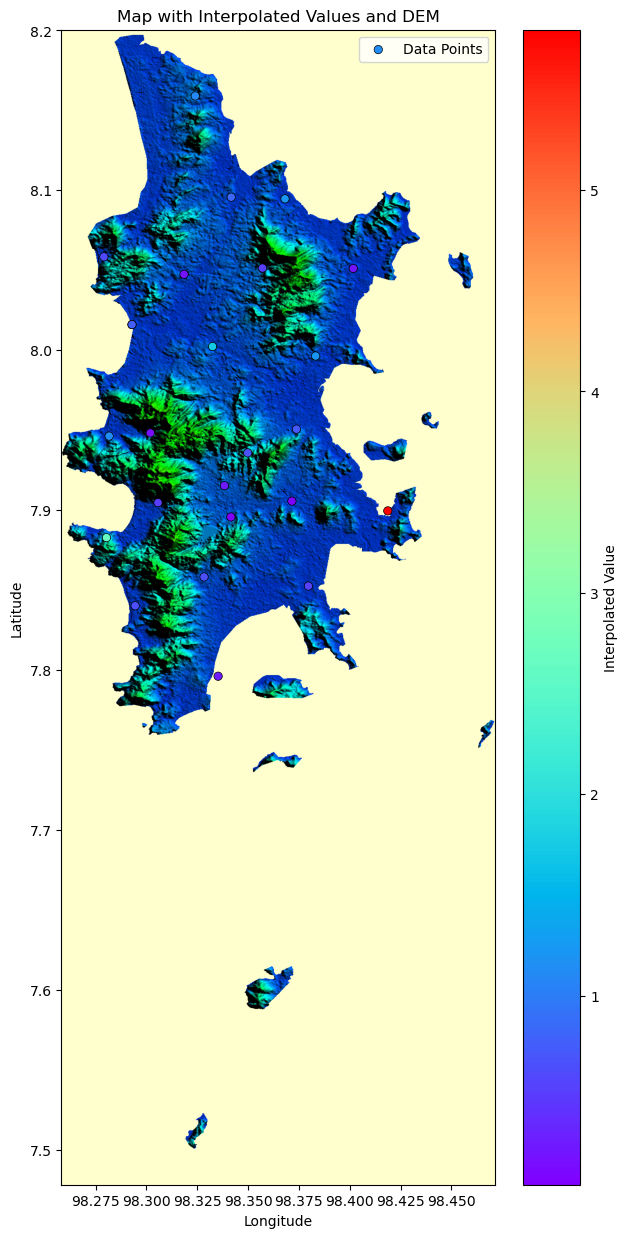

In [32]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Read boundary shapefile
boundary = gpd.read_file('42_amarea_phuket.shp')

# Read data points
data_points = pd.DataFrame({
    'latitude': [98.28164003, 98.30192309, 98.34981039, 98.33835732, 98.3415273, 98.30568869, 98.28032572, 
                 98.32834316, 98.29443996, 98.37378474, 98.41872192, 98.37154848, 98.33525366, 98.37966523, 
                 98.29288815, 98.29288815, 98.34168768, 98.32400153, 98.40172797, 98.27906604, 98.38323371, 
                 98.33250125, 98.31848849, 98.357069, 98.36815503],
    'longitude': [7.946391718, 7.948361888, 7.935921265, 7.915443421, 7.89585693, 7.904807752, 7.882939471, 
                  7.858380601, 7.840334632, 7.95074669, 7.899670793, 7.905780329, 7.79631549, 7.85267063, 
                  8.016129058, 8.016129058, 8.095742151, 8.159018429, 8.051188215, 8.058489257, 7.996465504, 
                  8.002401555, 8.047549013, 8.051455352, 8.094725712],
    'value': [1.11923063, 0.177554585, 0.675113129, 0.274599708, 0.061008084, 0.53134705, 
              2.648760286, 0.645864577, 0.645864577, 0.727582615, 5.796, 0.070220162, 
              0.265033808, 0.53688357, 0.760561154, 0.760561154, 0.829623413, 1.100289938, 
              0.214882744, 0.600039387, 1.206933333, 1.727331685, 0.203496983, 0.520499001, 
              1.241518025]
})

# Read DEM file
dem_data = plt.imread('42 DEM30m - mitrearth.tif')

# Create grid for interpolation
x_min, y_min, x_max, y_max = boundary.total_bounds
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, dem_data.shape[1]), np.linspace(y_min, y_max, dem_data.shape[0]))

# Interpolate using IDW (Rbf with linear function)
rbf = Rbf(data_points['latitude'], data_points['longitude'], data_points['value'], function='linear')

# Perform interpolation
z_grid = rbf(x_grid, y_grid)

# Plot interpolated map
plt.figure(figsize=(7,15))

# Set the extent to match the boundary
# plt.imshow(z_grid, extent=(x_min, x_max, y_min, y_max), cmap='viridis')

# Set the same extent for DEM data
plt.imshow(dem_data, extent=(x_min, x_max, y_min, y_max), cmap='gray', alpha=1, aspect='auto')

# Plot data points
plt.scatter(data_points['latitude'], data_points['longitude'], c=data_points['value'], cmap='rainbow', edgecolors='black', linewidths=0.5, label='Data Points')

plt.colorbar(label='Interpolated Value')
plt.title('Map with Interpolated Values and DEM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
